In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
%cd '/content/gdrive/Othercomputers/My MacBook Pro (1)/project2/'

/content/gdrive/Othercomputers/My MacBook Pro (1)/project2


In [5]:
%pip install mlrose_hiive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.7 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=e812d96efee39218f6266f25076387ab1121a2fbf19477af0a3b959c452d04b3
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [16]:
import mlrose_hiive as mlrose
import numpy as np
import time
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

In [17]:
def comb(n, k):
    return special.comb(n, k)
comb(32,2)

496.0

In [18]:
def solve_prob2(n,algo,prob,seed=123456,verbose=True,args=None):
    np.random.seed(seed)

    if prob == 'queens':
        fitness = mlrose.CustomFitness(queens_max)
        max_q = comb(n,2)
        bits = n
    elif prob == '4peaks':
        t_pct = 0.10
        fitness = mlrose.FourPeaks(t_pct=t_pct)
        max_q = four_peaks_optima(n, t_pct)
        bits = 2
    elif prob == 'flipflop':
        fitness = mlrose.FlipFlop()
        bits = 2
        max_q = n-1
        

    if algo == 'rhc':
        fn = mlrose.random_hill_climb
        params = {
                  'max_attempts':10,
                  'init_state':np.random.randint(bits,size=n),
                 'curve':True,
                  'restarts':0}     
        best_overall_fitness = fitness.evaluate(params['init_state'])
        best_fitness = best_overall_fitness
    elif algo == 'anneal':
        fn = mlrose.simulated_annealing
        params = {'schedule':mlrose.GeomDecay(init_temp=1),
                  'init_state':np.random.randint(bits,size=n),
                 'curve':True,
                  'max_attempts':100}
        best_overall_fitness = fitness.evaluate(params['init_state'])    
    elif algo == 'ga':
        fn = mlrose.genetic_alg
        best_overall_fitness = 0
        params = {
                 'curve':True,
                 'pop_size':200} 
    elif algo == 'mimic':
        fn = mlrose.mimic
        best_overall_fitness = 0
        params = {'curve':True, 'max_iters':np.inf, 'pop_size':200,'max_attempts':10} 
    
    if args is not None:
      params = args
    
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize = True, max_val = bits)
    
    results={}

    # Define initial state
    if verbose:
      print("Bitstring:", n, "Stopping point fitness:", max_q)

    # Use random restarts
    curve = np.ndarray((0,2))
    start_time = time.perf_counter()
    if algo == 'rhc':
      # Use random restarts
      ct = -1
      curve = np.ndarray((0,2))
      start_time = time.perf_counter()
      while best_overall_fitness < max_q:
          ct +=1
          # Solve problem using simulated annealing
          best_state, best_fitness, fitness_curve = fn(problem, **params)
          if best_fitness > best_overall_fitness:
              best_overall_fitness = best_fitness
              if verbose:
                print("New optimal:", best_overall_fitness)
          if (algo in ['rhc','anneal']) or (ct == 0):
            curve = np.append(curve,fitness_curve,axis=0)
          else:
            fitness_curve[:,1] = curve[-1,1] + fitness_curve[:,1]
            curve = np.append(curve,fitness_curve,axis=0)
          if algo in ['rhc','anneal']:
            params['init_state'] = np.random.randint(bits,size=n)
      results['restarts'] = ct
    else:
      # Solve problem using simulated annealing
      best_state, best_fitness, fitness_curve = fn(problem, **params)
 
    if best_fitness == max_q:
        print(algo,"SUCCESS", best_fitness)
    else:
      print(algo,"FAIL", best_fitness)

    total_time = time.perf_counter() - start_time
    
    results['time'] = total_time
    results['evals'] = fitness_curve[-1][1]
    results['curve'] = fitness_curve
    
    return results

In [22]:
def solve_prob(n,algo,prob,seed=123456,verbose=True,args=None):
    np.random.seed(seed)

    if prob == 'queens':
        fitness = mlrose.CustomFitness(queens_max)
        max_q = comb(n,2)
        bits = n
    elif prob == '4peaks':
        t_pct = 0.10
        fitness = mlrose.FourPeaks(t_pct=t_pct)
        max_q = four_peaks_optima(n, t_pct)
        bits = 2
    elif prob == 'flipflop':
        fitness = mlrose.FlipFlop()
        bits = 2
        max_q = n-1
        

    if algo == 'rhc':
        fn = mlrose.random_hill_climb
        params = {
                  'max_attempts':10,
                  'init_state':np.random.randint(bits,size=n),
                 'curve':True,
                  'restarts':0}     
        best_overall_fitness = fitness.evaluate(params['init_state'])
        best_fitness = best_overall_fitness
    elif algo == 'anneal':
        fn = mlrose.simulated_annealing
        params = {'schedule':mlrose.GeomDecay(init_temp=1),
                  'init_state':np.random.randint(bits,size=n),
                 'curve':True,
                  'max_attempts':100}
        best_overall_fitness = fitness.evaluate(params['init_state'])    
    elif algo == 'ga':
        fn = mlrose.genetic_alg
        best_overall_fitness = 0
        params = {
                 'curve':True,
                 'pop_size':200} 
    elif algo == 'mimic':
        fn = mlrose.mimic
        best_overall_fitness = 0
        params = {'curve':True, 'max_iters':np.inf, 'pop_size':200,'max_attempts':10} 
    
    if args is not None:
      params = args
    
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize = True, max_val = bits)
    
    results={}

    # Define initial state
    if verbose:
      print("Bitstring:", n, "Stopping point fitness:", max_q)

    # Use random restarts
    curve = np.ndarray((0,2))
    start_time = time.perf_counter()
    best_state, best_fitness, fitness_curve = fn(problem, **params)
    total_time = time.perf_counter() - start_time
    
    if best_fitness == max_q:
        print(algo,"SUCCESS", best_fitness)
    else:
      print(algo,"FAIL", best_fitness)


    results['time'] = total_time
    results['evals'] = fitness_curve[-1][1]
    results['curve'] = fitness_curve
    
    return results

# N-queens

In [19]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

   # Initialize counter
    fitness_cnt = 0

          # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

               # If no attacks, then increment counter
               fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness = mlrose.CustomFitness(queens_max)
fitness_min = mlrose.Queens()



In [26]:
queen_results = {}
for algo in ['mimic']:
  queen_results[algo] = {}


In [118]:
## Big problem to find best result
N = list(range(5,20,5))
N = [20]
for algo in ['mimic']:
  print(algo)
  for n in N:
    bits=n
    params = {'rhc':{'max_attempts':100,
                  'init_state':np.random.randint(bits,size=n),
                  'curve':True,
                  'restarts':1000},
              'anneal': {'schedule':mlrose.GeomDecay(init_temp=100),
                         'init_state':np.random.randint(bits,size=n),
                         'curve':True,
                         'max_attempts':500},
              'ga':{'curve':True,
                    'pop_size':800,
                    'max_attempts':500,
                    'mutation_prob':0.2} ,
              'mimic':{'curve':True,
                       'pop_size':10000,
                       'max_attempts':500,
                       'keep_pct':0.2}}
    queen_results[algo][n] = solve_prob(n,algo,'queens',args=params[algo])

print("complete")

mimic
Bitstring: 20 Stopping point fitness: 190.0


KeyboardInterrupt: ignored

## Plot curves

In [108]:
import math

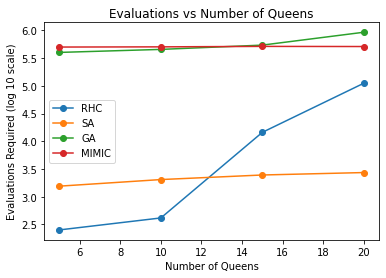

In [115]:
## Learning curves
N = list(queen_results['rhc'].keys())
N.sort()
max_n = max(N)
curves = {}
for algo in ['rhc','anneal','ga','mimic']:
  curves[algo] = {'x':[], 'y':[]}
  for n in N:
    curves[algo]['x'].append(n)
    curves[algo]['y'].append(math.log(queen_results[algo][n]['evals'],10))
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of Queens')
ax.set_ylabel('Evaluations Required (log 10 scale)')
ax.set_title("Evaluations vs Number of Queens")
ax.plot(curves['rhc']['x'],curves['rhc']['y'], marker="o", label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], marker="o",label="SA")
ax.plot(curves['ga']['x'],curves['ga']['y'], marker="o",label="GA")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], marker="o",label="MIMIC")
ax.legend()
plt.savefig('./paper/figures/n_queens_evals.png', format='png', transparent=True)



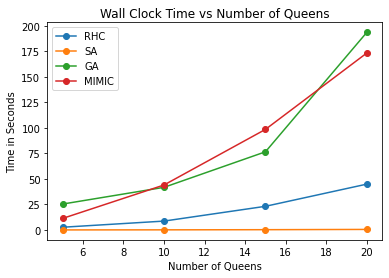

In [116]:

## Learning curves

N = list(queen_results['rhc'].keys())
N.sort()
curves = {}
for algo in ['rhc','anneal','ga','mimic']:
  curves[algo] = {'x':[], 'y':[]}
  for n in N:
    curves[algo]['x'].append(n)
    curves[algo]['y'].append(queen_results[algo][n]['time'])
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of Queens')
ax.set_ylabel('Time in Seconds')
ax.set_title("Wall Clock Time vs Number of Queens")
ax.plot(curves['rhc']['x'],curves['rhc']['y'], marker="o",label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], marker="o",label="SA")
ax.plot(curves['ga']['x'],curves['ga']['y'], marker="o",label="GA")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], marker="o",label="MIMIC")
ax.legend()
plt.savefig('./paper/figures/n_queens_time.png', format='png', transparent=True)



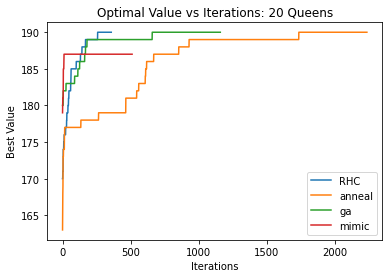

In [96]:
## Learning curves

max_n = 20

curves = {}
for algo in ['rhc','anneal','ga','mimic']:
  curves[algo] = {'x':list(range(0,queen_results[algo][max_n]['curve'].shape[0])),
                   'y':np.maximum.accumulate(queen_results[algo][max_n]['curve'][:,0]),}

fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Best Value')
ax.set_title("Optimal Value vs Iterations: " + str(max_n) + " Queens")
ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/n_queens_learning.png', format='png', transparent=True)


## Highlight Simulated Annealing

2

In [142]:
results = {}
decays = {'geom':mlrose.GeomDecay(100), 'exp':mlrose.ExpDecay(100)}
for decay, fn in decays.items():
  results[decay] = {}

In [148]:
N = list(range(10,110,10))

decays = {'geom':mlrose.GeomDecay(100), 'exp':mlrose.ExpDecay(100)}
N = list(range(90,110,10))
for decay, fn in decays.items():
  for algo in ['anneal']:
    print(algo, decay)
    for n in N:
      bits=n
      np.random.seed(123456)
      params = {'anneal': {'schedule':fn,
                          'init_state':np.random.randint(bits,size=n),
                          'curve':True,
                          'max_attempts':n*50}}
      results[decay][n] = solve_prob(n,algo,'queens',args=params[algo])
print("complete")

anneal geom
Bitstring: 10 Stopping point fitness: 45.0
anneal SUCCESS 45.0
Bitstring: 20 Stopping point fitness: 190.0
anneal SUCCESS 190.0
Bitstring: 30 Stopping point fitness: 435.0
anneal SUCCESS 435.0
Bitstring: 40 Stopping point fitness: 780.0
anneal SUCCESS 780.0
Bitstring: 50 Stopping point fitness: 1225.0
anneal SUCCESS 1225.0
Bitstring: 60 Stopping point fitness: 1770.0
anneal SUCCESS 1770.0
Bitstring: 70 Stopping point fitness: 2415.0
anneal SUCCESS 2415.0
Bitstring: 80 Stopping point fitness: 3160.0
anneal SUCCESS 3160.0
anneal exp
Bitstring: 10 Stopping point fitness: 45.0
anneal SUCCESS 45.0
Bitstring: 20 Stopping point fitness: 190.0
anneal SUCCESS 190.0
Bitstring: 30 Stopping point fitness: 435.0
anneal SUCCESS 435.0
Bitstring: 40 Stopping point fitness: 780.0
anneal SUCCESS 780.0
Bitstring: 50 Stopping point fitness: 1225.0
anneal SUCCESS 1225.0
Bitstring: 60 Stopping point fitness: 1770.0
anneal SUCCESS 1770.0
Bitstring: 70 Stopping point fitness: 2415.0
anneal SUCCESS

In [150]:
results

{'geom': {10: {'time': 0.23007398099798593,
   'evals': 4168.0,
   'curve': array([[3.100e+01, 3.000e+00],
          [3.100e+01, 5.000e+00],
          [2.900e+01, 7.000e+00],
          ...,
          [4.500e+01, 4.166e+03],
          [4.500e+01, 4.167e+03],
          [4.500e+01, 4.168e+03]])},
  20: {'time': 0.7077133930033597,
   'evals': 3967.0,
   'curve': array([[1.640e+02, 3.000e+00],
          [1.660e+02, 5.000e+00],
          [1.660e+02, 7.000e+00],
          ...,
          [1.900e+02, 3.965e+03],
          [1.900e+02, 3.966e+03],
          [1.900e+02, 3.967e+03]])},
  30: {'time': 2.2159369949986285,
   'evals': 5706.0,
   'curve': array([[4.020e+02, 3.000e+00],
          [4.010e+02, 5.000e+00],
          [4.030e+02, 7.000e+00],
          ...,
          [4.350e+02, 5.704e+03],
          [4.350e+02, 5.705e+03],
          [4.350e+02, 5.706e+03]])},
  40: {'time': 3.6761156089996803,
   'evals': 5422.0,
   'curve': array([[7.310e+02, 3.000e+00],
          [7.290e+02, 5.000e+00],
 

In [139]:
t_geom = [results['geom'][t]['restarts'] for t in N]
#t_arith = [results['arith'][t]['restarts'] for t in N]
t_exp = [results['exp'][t]['restarts'] for t in N]



fig, ax = plt.subplots()
ax.set_xlabel('Num of Queens')
ax.set_ylabel('Restarts Required')
ax.set_title("Comparing Decay Schedules for Simulated Annealing")
ax.plot(N, t_geom, marker="o", label="Geometric")
ax.plot(N, t_exp, marker="o", label="Exponential")
ax.legend()
plt.savefig('./paper/figures/n_queens_sa_restarts.png', format='png', transparent=True)


KeyError: ignored

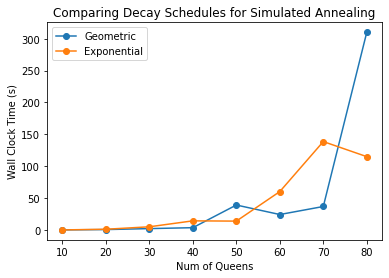

In [151]:
t_geom = [results['geom'][t]['time'] for t in N]
#t_arith = [results['arith'][t]['time'] for t in N]
t_exp = [results['exp'][t]['time'] for t in N]


fig, ax = plt.subplots()
ax.set_xlabel('Num of Queens')
ax.set_ylabel('Wall Clock Time (s)')
ax.set_title("Comparing Decay Schedules for Simulated Annealing")
#ax.plot(N, t_arith, marker="o", label="Arithmetic")
ax.plot(N, t_geom, marker="o", label="Geometric")
ax.plot(N, t_exp, marker="o", label="Exponential")
ax.legend()
plt.savefig('./paper/figures/n_queens_sa_time.png', format='png', transparent=True)


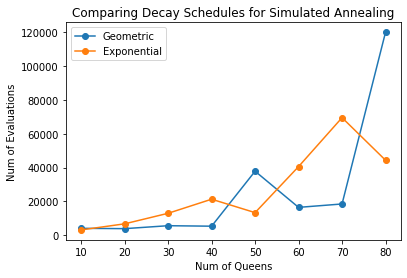

In [152]:
t_geom = [results['geom'][t]['evals'] for t in N]
# t_arith = [results['arith'][t]['evals'] for t in N]
t_exp = [results['exp'][t]['evals'] for t in N]



fig, ax = plt.subplots()
ax.set_xlabel('Num of Queens')
ax.set_ylabel('Num of Evaluations')
ax.set_title("Comparing Decay Schedules for Simulated Annealing")
# ax.plot(N, t_arith, marker="o", label="Arithmetic")
ax.plot(N, t_geom, marker="o", label="Geometric")
ax.plot(N, t_exp, marker="o", label="Exponential")
ax.legend()
plt.savefig('./paper/figures/n_queens_sa_evals.png', format='png', transparent=True)


# Four peaks

In [154]:
t_pct = 0.10
fitness = mlrose.FourPeaks(t_pct=t_pct)
peaks_results = {}

In [155]:
import math
def four_peaks_optima(n,t_pct):
    T = math.ceil(t_pct * n)
    optima = np.concatenate([np.ones((T+1,), dtype=np.int8), np.zeros((n-T-1,), dtype=np.int8)])
    return fitness.evaluate(optima)


dict_keys([20])

In [192]:
peaks_results = {}
for algo in ['rhc','anneal','ga','mimic']:
  peaks_results[algo] = {}


In [ ]:
N = list(range(5,20,5))
N = [80]
for algo in ['rhc','mimic']:
  for n in N:
    np.random.seed(123456)
    bits=2
    params = {'rhc':{'max_attempts':50,
                  'init_state':np.random.randint(bits,size=n),
                  'curve':True,
                  'restarts':1000,
                  'max_iters':5000},
              'anneal': {'schedule':mlrose.GeomDecay(init_temp=100),
                         'init_state':np.random.randint(bits,size=n),
                         'curve':True,
                         'max_attempts':500,
                         'max_iters':5000},
              'ga':{'curve':True,
                    'pop_size':800,
                    'max_attempts':50,
                    'mutation_prob':0.2,
                         'max_iters':5000} ,
              'mimic':{'curve':True,
                       'pop_size':1600,
                       'max_attempts':100,
                       'keep_pct':0.05,
                         'max_iters':5000}}
    peaks_results[algo][n] = solve_prob2(n,algo,'4peaks',args=params[algo])

print("complete")

Bitstring: 80 Stopping point fitness: 151
New optimal: 26.0
New optimal: 27.0
New optimal: 31.0
New optimal: 94.0
New optimal: 102.0
New optimal: 108.0
New optimal: 110.0
New optimal: 122.0


In [ ]:
## add to results dict
N=[2]
for algo in ['rhc','anneal','ga','mimic']:
  for n in N:
    peaks_results[algo][n] = solve_prob(n,algo,'4peaks')
peaks_results

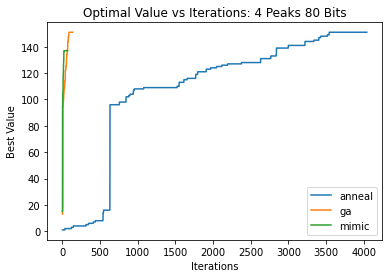

In [264]:
## Learning curves
N = list(peaks_results['anneal'].keys())
max_n = max(N)
curves = {}
for algo in ['anneal','ga','mimic']:
  max_i = min(5000,peaks_results[algo][max_n]['curve'].shape[0])
  curves[algo] = {'x':list(range(0,max_i)),
                   'y':np.maximum.accumulate(peaks_results[algo][max_n]['curve'][0:max_i,0]),}

fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Best Value')
ax.set_title("Optimal Value vs Iterations: 4 Peaks "+str(max_n)+" Bits")
# ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/peaks_learning.png', format='png', transparent=True)

In [215]:
N

[5, 10, 15, 20]

[20, 5, 10, 15, 60, 80]

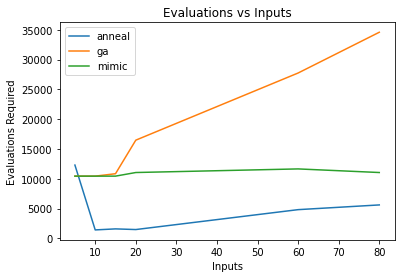

In [226]:

curves = {}
for algo in ['anneal','ga','mimic']:
  N = list(peaks_results[algo].keys())
  N.sort()
  max_n = max(N)
  curves[algo] = {'x':[], 'y':[]}
  for n in range(10,90):
    curves[algo]['x'].append(n)
    curves[algo]['y'].append(peaks_results[algo][n]['evals'])
    
fig, ax = plt.subplots()
ax.set_xlabel('Inputs')
ax.set_ylabel('Evaluations Required')
ax.set_title("Evaluations vs Inputs")
# ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/peaks_evals.png', format='png', transparent=True)

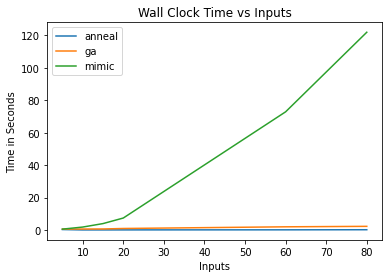

In [227]:
## Learning curves

curves = {}
for algo in ['anneal','ga','mimic']:
  N = list(peaks_results[algo].keys())
  N.sort()
  max_n = max(N)
  curves[algo] = {'x':[], 'y':[]}
  for n in N:
    curves[algo]['x'].append(n)
    curves[algo]['y'].append(peaks_results[algo][n]['time'])
    
fig, ax = plt.subplots()
ax.set_xlabel('Inputs')
ax.set_ylabel('Time in Seconds')
ax.set_title("Wall Clock Time vs Inputs")
# ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/peaks_time.png', format='png', transparent=True)

In [160]:
np.random.seed(123456)
n = 25
t_pct = 0.10
fitness = mlrose.FourPeaks(t_pct=t_pct)
max_q = four_peaks_optima(n, t_pct)
problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness, maximize = True, max_val = 2)

best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, max_iters=50, max_attempts=10, curve=True )

In [161]:
fitness_curve

array([[  31.,  402.],
       [  35.,  604.],
       [  35.,  805.],
       [  35., 1006.],
       [  35., 1207.],
       [  35., 1408.],
       [  35., 1609.],
       [  39., 1811.],
       [  39., 2012.],
       [  39., 2213.],
       [  39., 2414.],
       [  39., 2615.],
       [  39., 2816.],
       [  42., 3018.],
       [  43., 3220.],
       [  44., 3422.],
       [  46., 3624.],
       [  46., 3825.],
       [  46., 4026.],
       [  46., 4227.],
       [  46., 4428.],
       [  46., 4629.],
       [  46., 4830.],
       [  46., 5031.],
       [  46., 5232.],
       [  46., 5433.],
       [  46., 5634.]])

In [162]:
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, max_iters=50, max_attempts=10, curve=True )

In [229]:
flip_results = {}
for algo in ['rhc','anneal','ga','mimic']:
  flip_results[algo] = {}

In [253]:
N = [10,20,30,40]

algos = ['ga']
for algo in algos:
  print(algo)
  for n in N:
    np.random.seed(123456)
    bits=2
    params = {'rhc':{'max_attempts':500,
                  'init_state':np.random.randint(bits,size=n),
                  'curve':True,
                  'restarts':1000},
              'anneal': {'schedule':mlrose.GeomDecay(init_temp=1),
                         'init_state':np.random.randint(bits,size=n),
                         'curve':True,
                         'max_attempts':100,
                         },
              'ga':{'curve':True,
                    'pop_size':600,
                    'max_attempts':500,
                    'mutation_prob':0.05} ,
              'mimic':{'curve':True,
                       'pop_size':800,
                       'max_attempts':10,
                       'keep_pct':0.05}}
    flip_results[algo][n] = solve_prob(n,algo,'flipflop',args=params[algo])

print("complete")

ga
Bitstring: 10 Stopping point fitness: 9
ga SUCCESS 9.0
Bitstring: 20 Stopping point fitness: 19


KeyboardInterrupt: ignored

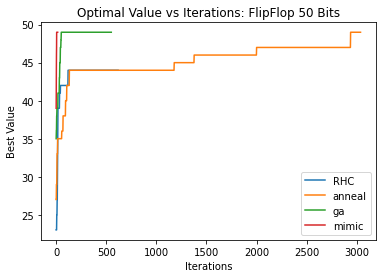

In [246]:
N = list(flip_results['anneal'].keys())
max_n = max(N)
curves = {}
for algo in ['rhc','anneal','ga','mimic']:
  max_i = min(10000,flip_results[algo][max_n]['curve'].shape[0])
  curves[algo] = {'x':list(range(0,max_i)),
                   'y':np.maximum.accumulate(flip_results[algo][max_n]['curve'][0:max_i,0]),}

fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Best Value')
ax.set_title("Optimal Value vs Iterations: FlipFlop "+str(max_n)+" Bits")
ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/flip_learning.png', format='png', transparent=True)

In [248]:
flip_results['rhc']

{50: {'time': 70.48485096700097, 'evals': 630.0, 'curve': array([[ 23.,   1.],
         [ 23.,   2.],
         [ 23.,   3.],
         ...,
         [ 44., 628.],
         [ 44., 629.],
         [ 44., 630.]])}}

In [249]:
N

[50]

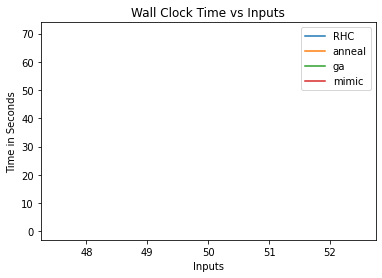

In [247]:
## Learning curves
curves = {}
for algo in ['rhc','anneal','ga','mimic']:
  curves[algo] = {'x':[], 'y':[]}
  for n in N:
    curves[algo]['x'].append(n)
    curves[algo]['y'].append(flip_results[algo][n]['time'])
    
fig, ax = plt.subplots()
ax.set_xlabel('Inputs')
ax.set_ylabel('Time in Seconds')
ax.set_title("Wall Clock Time vs Inputs")
ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/flip_time.png', format='png', transparent=True)

In [ ]:
curves = {}
for algo in ['rhc','anneal','ga','mimic']:
  curves[algo] = {'x':[], 'y':[]}
  for n in N:
    curves[algo]['x'].append(n)
    curves[algo]['y'].append(flip_results[algo][n]['evals'])
    
fig, ax = plt.subplots()
ax.set_xlabel('Inputs')
ax.set_ylabel('Evaluations Required')
ax.set_title("Evaluations vs Inputs")
ax.plot(curves['rhc']['x'],curves['rhc']['y'], label="RHC")
ax.plot(curves['anneal']['x'],curves['anneal']['y'], label="anneal")
ax.plot(curves['ga']['x'],curves['ga']['y'], label="ga")
ax.plot(curves['mimic']['x'],curves['mimic']['y'], label="mimic")
ax.legend()
plt.savefig('./paper/figures/flip_evals.png', format='png', transparent=True)